Elile AI Intern Kaggle Competition
| Part 1
| Agastya Mongia

Solar Power Generation Prediction and Fault/Abnormalities Analysis

Goal: To understand the basics of solar power plants and conduct detailed data analysis and
basic model training on given Plant 1 data to predict future power output values in the
solar power dataset. Advanced machine learning techniques to improve model performance
will be done in Part 2.

Note: The following data analysis, model training, and further understanding is done using Plant 1 data.

Terminology:

Peak Sun Hours (PSH): hours for which power at the rate of 1kW/m2 would give an equivalent amount of energy to the total energy for that day

Irridation (Insolation): amount of radiant solar energy per unit area received over a given period of time

Daily irridation = Daily PSH

Irradiance = solar radiation incident on a surface at any given time (W/m2)

Context:

Proven in recent years to be the best source of green energy, Photo Voltaic (PV) Solar Power has been gaining momentum and has a very promising future in the world of energy and creating a more sustainable lifestyle as a society. PV power plants are conventional power plants designed to produce bulk electrical power from solar radiation - converting solar power into electrical power.

PV Power Plant Structure/Organization:

1. Sunlight falls on PV modules
2. PV modules generate DC power via DC fuse boxes
3. DC power is fed into inverters to convert DC power to AC power
4. AC power is stepped up through transformers to match grid voltage
5. Power is fed into the grid through a switchgear

Challenges with PV Solar Power Generation and Plants:
- Are only functional and able to output electrical power when it is day-time
- Output is variable on the amount of sunlight (solar radiation)
- Power that is generated needs to be consumed immediately since there is no storage as of now
- A plant needs to be spread over a large, open, and shadow-free area for optimal production
- Regular cleaning and maintainence is required

Note: A Python 3 environment will be used for this project, coming with helpful analytics libraries installed
Below some helpful packages are loaded:
- numpy for numerical computing
- pandas for data analysis and manipulation
- pyplot for creating visuals (graphs)
- seaborn for providing a high-level interface for statistical graphs
- datetime for parsing/formatting dates

In [164]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# pd.set_option('precision',3)

In [165]:
# Load Plant 1 Generation Data
plant1_generation_data = pd.read_csv('/Users/agastya/ElileAI/KaggleInput/Plant_1_Generation_Data.csv')

# Load Plant 1 Weather Sensor Data
plant1_weather_sensor_data = pd.read_csv('/Users/agastya/ElileAI/KaggleInput/Plant_1_Weather_Sensor_Data.csv')

# verify neither files are empty
if not plant1_generation_data.empty and not plant1_weather_sensor_data.empty:
    print("\nboth csv files loaded!")
else:
    print("one or both of the csv files are empty!")

# Handle missing values (rows with NaN values) in dataset
plant1_generation_data.dropna(inplace=True)
plant1_weather_sensor_data.dropna(inplace=True)
print("missing values dropped!")

# Drop duplicates from dataset
plant1_generation_data.drop_duplicates(inplace=True)
plant1_weather_sensor_data.drop_duplicates(inplace=True)
print("duplicates dropped!")

# Sampling Plant 1 Generation Data
plant1_generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    }
)


both csv files loaded!
missing values dropped!
duplicates dropped!


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
13470,22-05-2020 03:30,4135001,zBIq5rxdHJRwDNY,0.000000,0.000000,0.000000,6388599.000000
16375,23-05-2020 15:00,4135001,uHbuxQJl8lW7ozc,5340.000000,523.414286,7022.714286,7102275.714000
22187,26-05-2020 10:00,4135001,YxYtjZvoooNbGkE,10819.571430,1057.471429,1981.714286,7263445.714000
65223,16-06-2020 07:00,4135001,ZoEaEvLYb1n2sOq,1426.714286,139.171429,60.714286,7329751.714000
37545,03-06-2020 02:30,4135001,ih0vzX44oOqAx2f,0.000000,0.000000,0.000000,6321311.000000


In [166]:
# Sampling Plant 1 Weather Sensor Data
plant1_weather_sensor_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    }
)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2802,2020-06-14 01:00:00,4135001,HmiyD2TTLFNqkNe,22.339699,20.416589,0.000000
1056,2020-05-26 16:00:00,4135001,HmiyD2TTLFNqkNe,33.405877,46.343874,0.370853
957,2020-05-25 15:15:00,4135001,HmiyD2TTLFNqkNe,34.232937,54.871442,0.677357
3094,2020-06-17 02:00:00,4135001,HmiyD2TTLFNqkNe,22.626906,21.193654,0.000000
1803,2020-06-03 15:15:00,4135001,HmiyD2TTLFNqkNe,28.852883,50.806604,0.778130


Data Pre-Processing and AC Power Statistics Summary

In [167]:
# Convert DATE_TIME column to datetime data type
plant1_generation_data['DATE_TIME'] = pd.to_datetime(plant1_generation_data['DATE_TIME'])
plant1_weather_sensor_data['DATE_TIME'] = pd.to_datetime(plant1_weather_sensor_data['DATE_TIME'])

# Group by date and calculate the mean daily yield
average_daily_yield_plant1 = plant1_generation_data.groupby(plant1_generation_data['DATE_TIME'].dt.date)['DAILY_YIELD'].mean()

# Sort in descending order based on average daily yield
sorted_average_daily_yield_plant1 = average_daily_yield_plant1.sort_values(ascending=False)

# Display sorted average daily yield
print("\nSorted Average Daily Yield:")
print(sorted_average_daily_yield_plant1)

# Calculate and display AC Power statistics (included average, min, max, etc)
plant1_ac_power_stats = plant1_generation_data['AC_POWER'].describe()
print("\nPlant 2 AC Power Statistics:")
print(plant1_ac_power_stats)


Sorted Average Daily Yield:
DATE_TIME
2020-05-21    4844.519541
2020-05-25    4394.764566
2020-05-23    4325.328418
2020-06-13    4122.122827
2020-05-29    4096.258698
2020-06-08    4027.107978
2020-06-09    3911.125507
2020-05-24    3873.698458
2020-05-28    3827.339586
2020-05-17    3695.106669
2020-06-07    3668.138367
2020-06-03    3666.657630
2020-05-16    3464.273323
2020-06-14    3428.334796
2020-06-15    3379.466306
2020-05-20    3356.779939
2020-05-30    3338.140278
2020-06-10    3162.781074
2020-06-16    3083.610239
2020-06-05    3069.291804
2020-06-01    3024.615471
2020-06-02    2981.198957
2020-06-04    2968.519653
2020-06-17    2968.511882
2020-05-19    2962.975236
2020-05-31    2950.626721
2020-06-12    2769.326299
2020-05-22    2739.611023
2020-06-11    2622.203675
2020-05-15    2586.279926
2020-05-27    2498.541264
2020-06-06    2474.082280
2020-05-18    2429.114465
2020-05-26    2112.023726
Name: DAILY_YIELD, dtype: float64

Plant 2 AC Power Statistics:
count    6877

Merging Plant 1 Generation and Weather Sensor Data

In [168]:
df_solar = pd.merge(plant1_generation_data.drop(columns = ['PLANT_ID']), plant1_weather_sensor_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
25492,2020-05-28 00:45:00,3PZuoBAID5Wc2HD,0.000000,0.000000,0.000000,7085451.000000,23.120673,21.726373,0.000000
30869,2020-05-30 22:15:00,uHbuxQJl8lW7ozc,0.000000,0.000000,7340.000000,7159272.000000,23.247797,21.252519,0.000000
59591,2020-06-13 15:00:00,ih0vzX44oOqAx2f,10300.250000,1006.987500,7028.500000,6399291.500000,27.583285,47.947290,0.733720
21923,2020-05-26 07:00:00,YxYtjZvoooNbGkE,1779.285714,174.271429,79.285714,7261543.286000,23.546954,23.866823,0.158289
17584,2020-05-24 05:00:00,sjndEbLyjtCKgGv,0.000000,0.000000,0.000000,7081449.000000,23.623785,20.635244,0.000000


In [169]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(1)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15


In [170]:
# concise summary (overview) of merged dataframe
# 68,773 entries
# All non-null values since missing and duplicate values were dropped
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   SOURCE_KEY           68774 non-null  object        
 2   DC_POWER             68774 non-null  float64       
 3   AC_POWER             68774 non-null  float64       
 4   DAILY_YIELD          68774 non-null  float64       
 5   TOTAL_YIELD          68774 non-null  float64       
 6   AMBIENT_TEMPERATURE  68774 non-null  float64       
 7   MODULE_TEMPERATURE   68774 non-null  float64       
 8   IRRADIATION          68774 non-null  float64       
 9   DATE                 68774 non-null  object        
 10  TIME                 68774 non-null  object        
 11  DAY                  68774 non-null  int32         
 12  MONTH                68774 non-null  int32         
 13  HOURS                68774 non-

In [171]:
# verification that there are no missing values in the dataframe
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

Merged Power Statistic Summary (table)

In [172]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,MINUTES,TOTAL MINUTES PASS
count,68774,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000
mean,2020-06-01 08:02:38.161514240,3147.177450,307.778375,3295.834644,6978727.511362,25.558521,31.244997,0.232305,15.762876,5.518539,22.490621,716.515107
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,6183645.000000,20.398505,18.140415,0.000000,1.000000,5.000000,0.000000,0.000000
25%,2020-05-24 00:33:45,0.000000,0.000000,0.000000,6512006.826000,22.724491,21.123944,0.000000,9.000000,5.000000,0.000000,360.000000
50%,2020-06-01 14:15:00,428.571429,41.450000,2658.473214,7146685.000000,24.670178,24.818984,0.031620,16.000000,6.000000,15.000000,720.000000
75%,2020-06-09 20:00:00,6365.468750,623.561161,6274.000000,7268751.397000,27.960429,41.693659,0.454880,23.000000,6.000000,30.000000,1065.000000
max,2020-06-17 23:45:00,14471.125000,1410.950000,9163.000000,7846821.000000,35.252486,65.545714,1.221652,31.000000,6.000000,45.000000,1425.000000
std,nan,4036.441826,394.394865,3145.220597,416270.720885,3.361300,12.308283,0.301948,8.554460,0.499660,16.772385,412.069969


Label Encoding: converting 'SOURCE_KEY' from categorical to numerical form

A process that is often required for machine learning algorithms that require numerical input

New numerical labels are stored in the final column: SOURCE_KEY_NUMBER

In [173]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])

# moving SOURCE_KEY_NUMBER column further left in the table
source_key_number = df_solar.pop('SOURCE_KEY_NUMBER')
df_solar.insert(2, 'SOURCE_KEY_NUMBER', source_key_number)

df_solar.head(2)

,DATE_TIME,SOURCE_KEY,SOURCE_KEY_NUMBER,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,1BY6WEcLGh8j5v7,0,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
1,2020-05-15,1IF53ai7Xc0U56Y,1,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15


Data Visualization
- Distribution plot representing the ambient temperature 
- The data of this solar power generation of Plant 2 spans over a 34 day period.

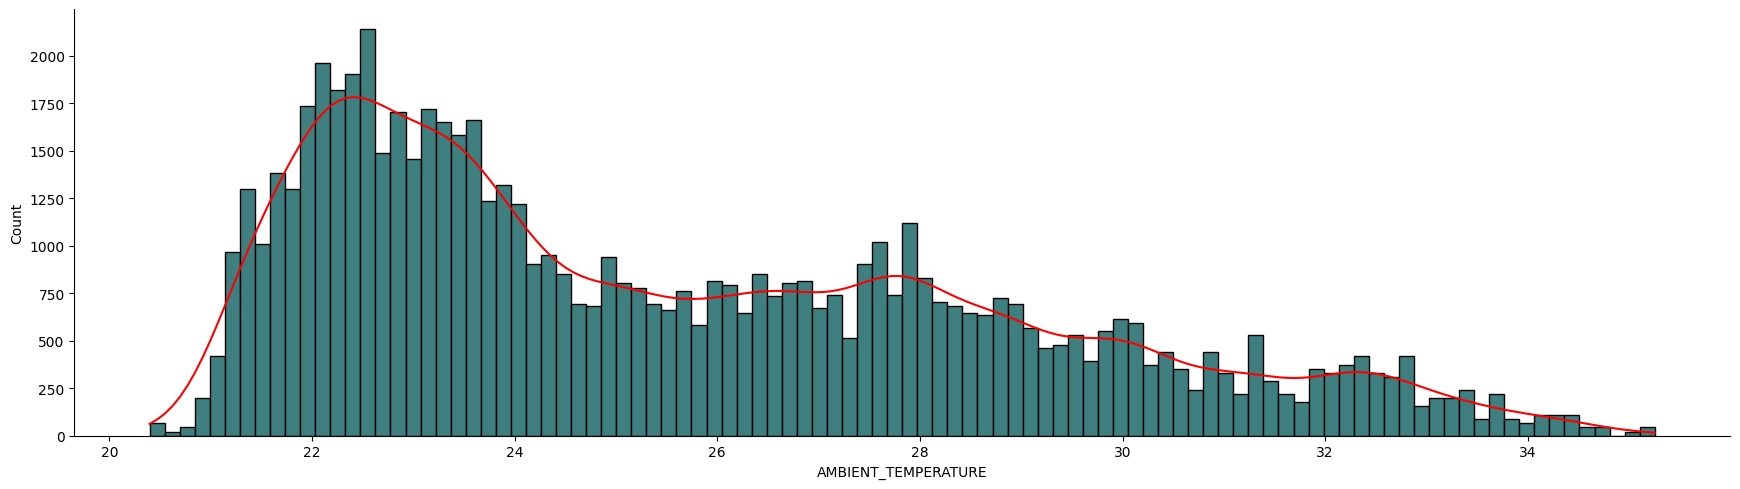

In [174]:
# distribution plot of the ambient temperature of Plant 1 (also includes kernal density estimate (red line))
# a kernel density estimate (KDE) provides a smooth, continuous estimate of the data distribution, making it easier to identify patterns and trends
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [175]:
print(str(df_solar['DATE'].nunique()) + ' days')

34 days


Ideally, a graph of solar power generation looks like a bell curve, with the amount of solar output increasing as time progresses during a day, solar output peaking at midday when the sun is directly above solar panels, then decreasing as the sun sets and night falls. This is since when the sun is directly above solar panels, sunlight doesn't need to travel through as much atmosphere to reach the panels, and more solar radiation can be absorbed and converted to electrical power.

We will now understand and detect faults and abnormalities in solar power plant generation.

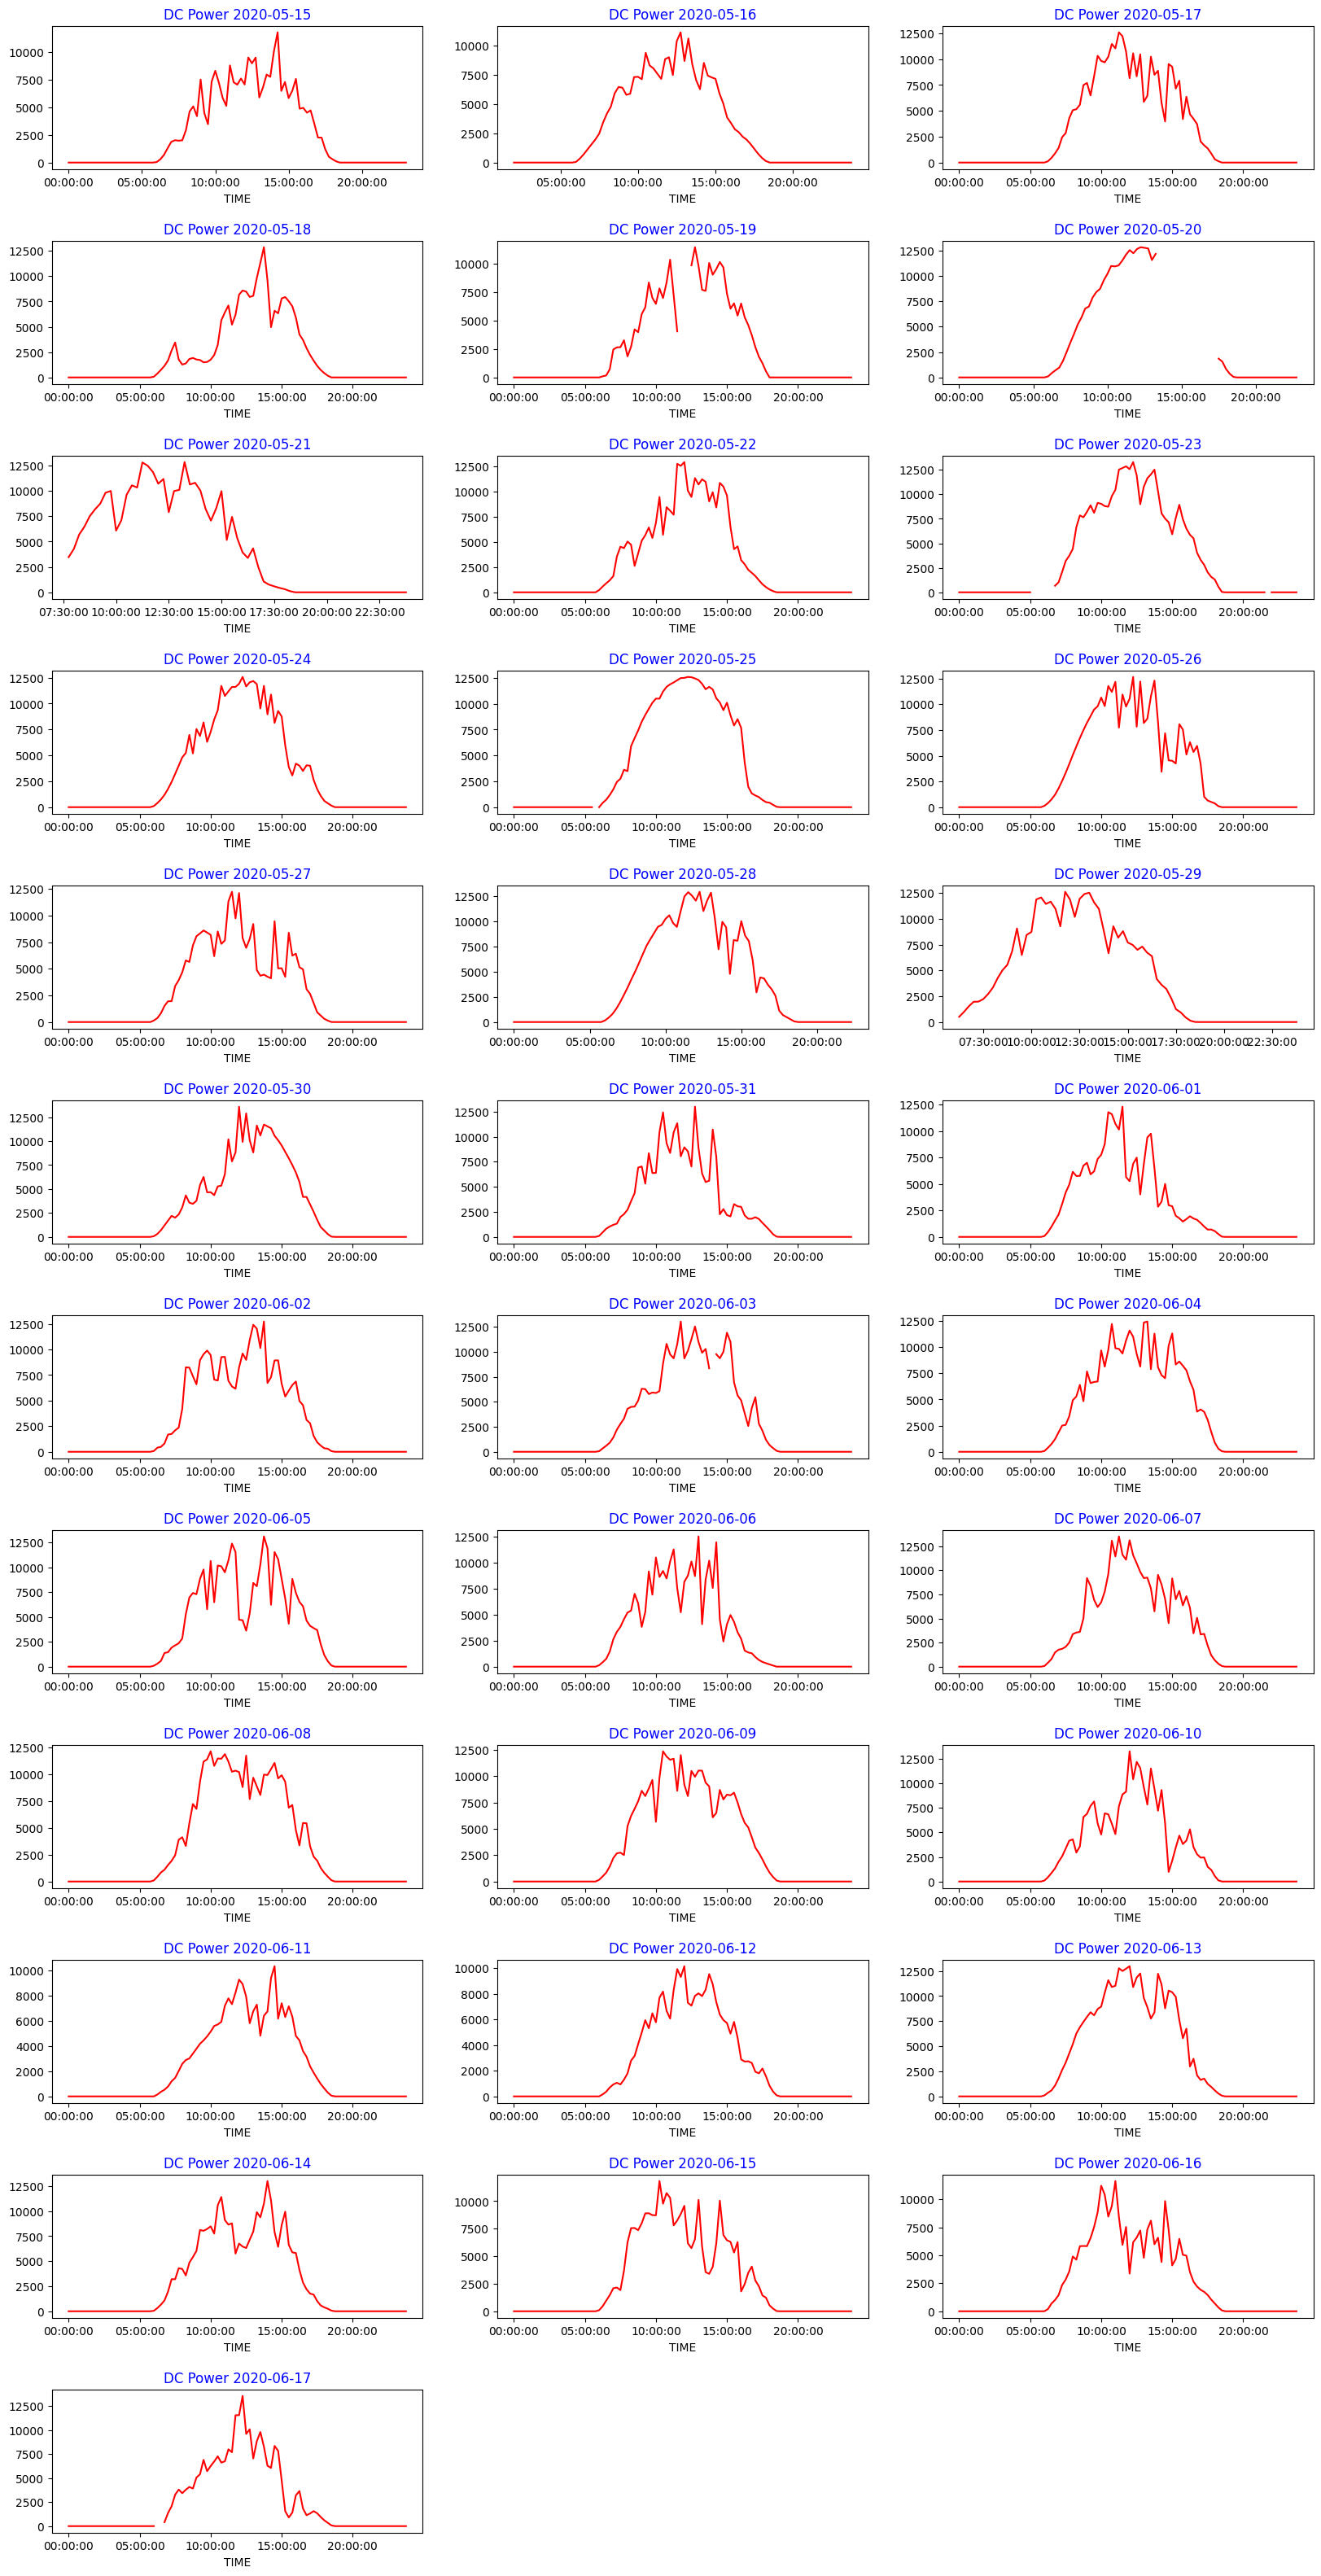

In [176]:
# Multiple plotting of DC_POWER generation on a per day basis
# Visualizing DC Power readings across different days

# creating dataframe
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

# defining a new data plotting function to create a grid of subplots
def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
# calling function
Daywise_plot(data=solar_dc, row=12, col=3)

From this graph we can determine some abnormalities in DC_POWER generation. Most days there is some fluctuation. Here is a more in-depth analysis:

Days observed to have LITTLE fluctuation in DC Power Generation:
- 2020-05-24
- 2020-05-25
- 2020-06-04
- 2020-06-12

Days observed to have HIGH fluctuation in DC Power Generation:
- 2020-05-16
- 2020-05-20
- 2020-06-03
- 2020-06-10

Days observed to have VERY HIGH fluctuation in DC Power Generation:
- 2020-05-15
- 2020-05-19
- 2020-05-31
- 2020-06-06

There are a few possible reasons for this:
- Faults in the system (Plant 1)
- Fluctuation in weather (clouds coming and going)

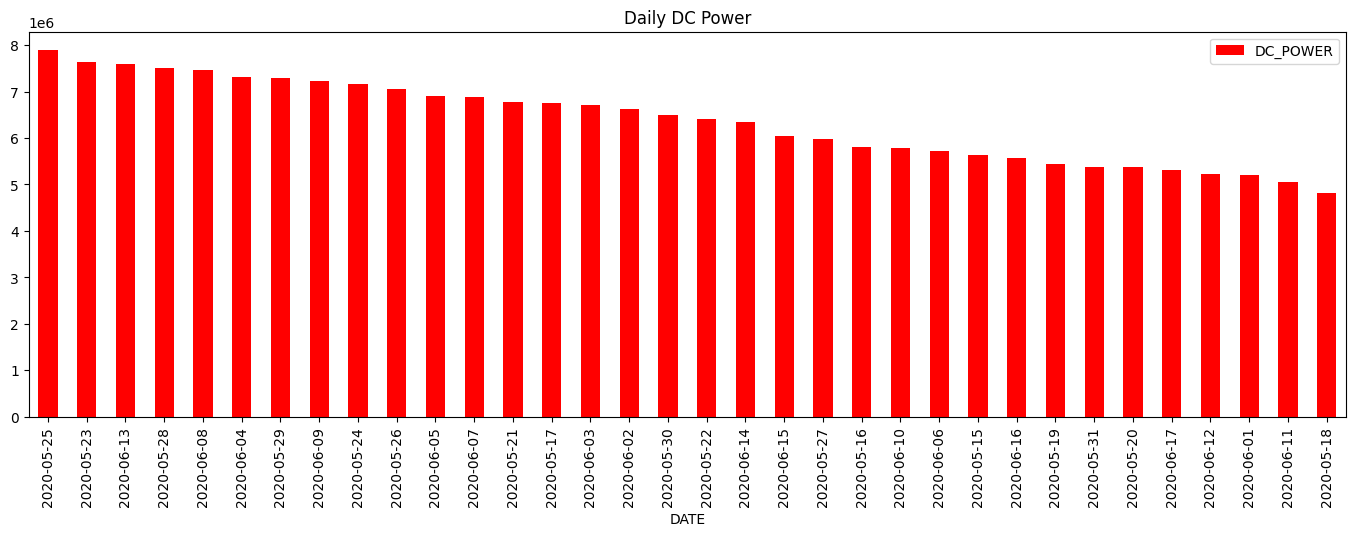

In [177]:
# Total DC_POWER per day graphed on a bar plot in descending order
# This graph helps visualize and understand which days had the most and least DC power generated

daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

Most DC power generated on: 2020-05-25

Least DC power generated on: 2020-05-18

Below irridation graph patterns have been plotted. Notice how they look similar to DC_POWER generation on a per day basis.

In PV Power Plants, DC_POWER (output) is mostly dependent on irridation, since irridation is the amount of radiant solar energy received over a given time period (in this case, day). They are in fact, directly proportional.

(see 'Terminology' above for more definitions)

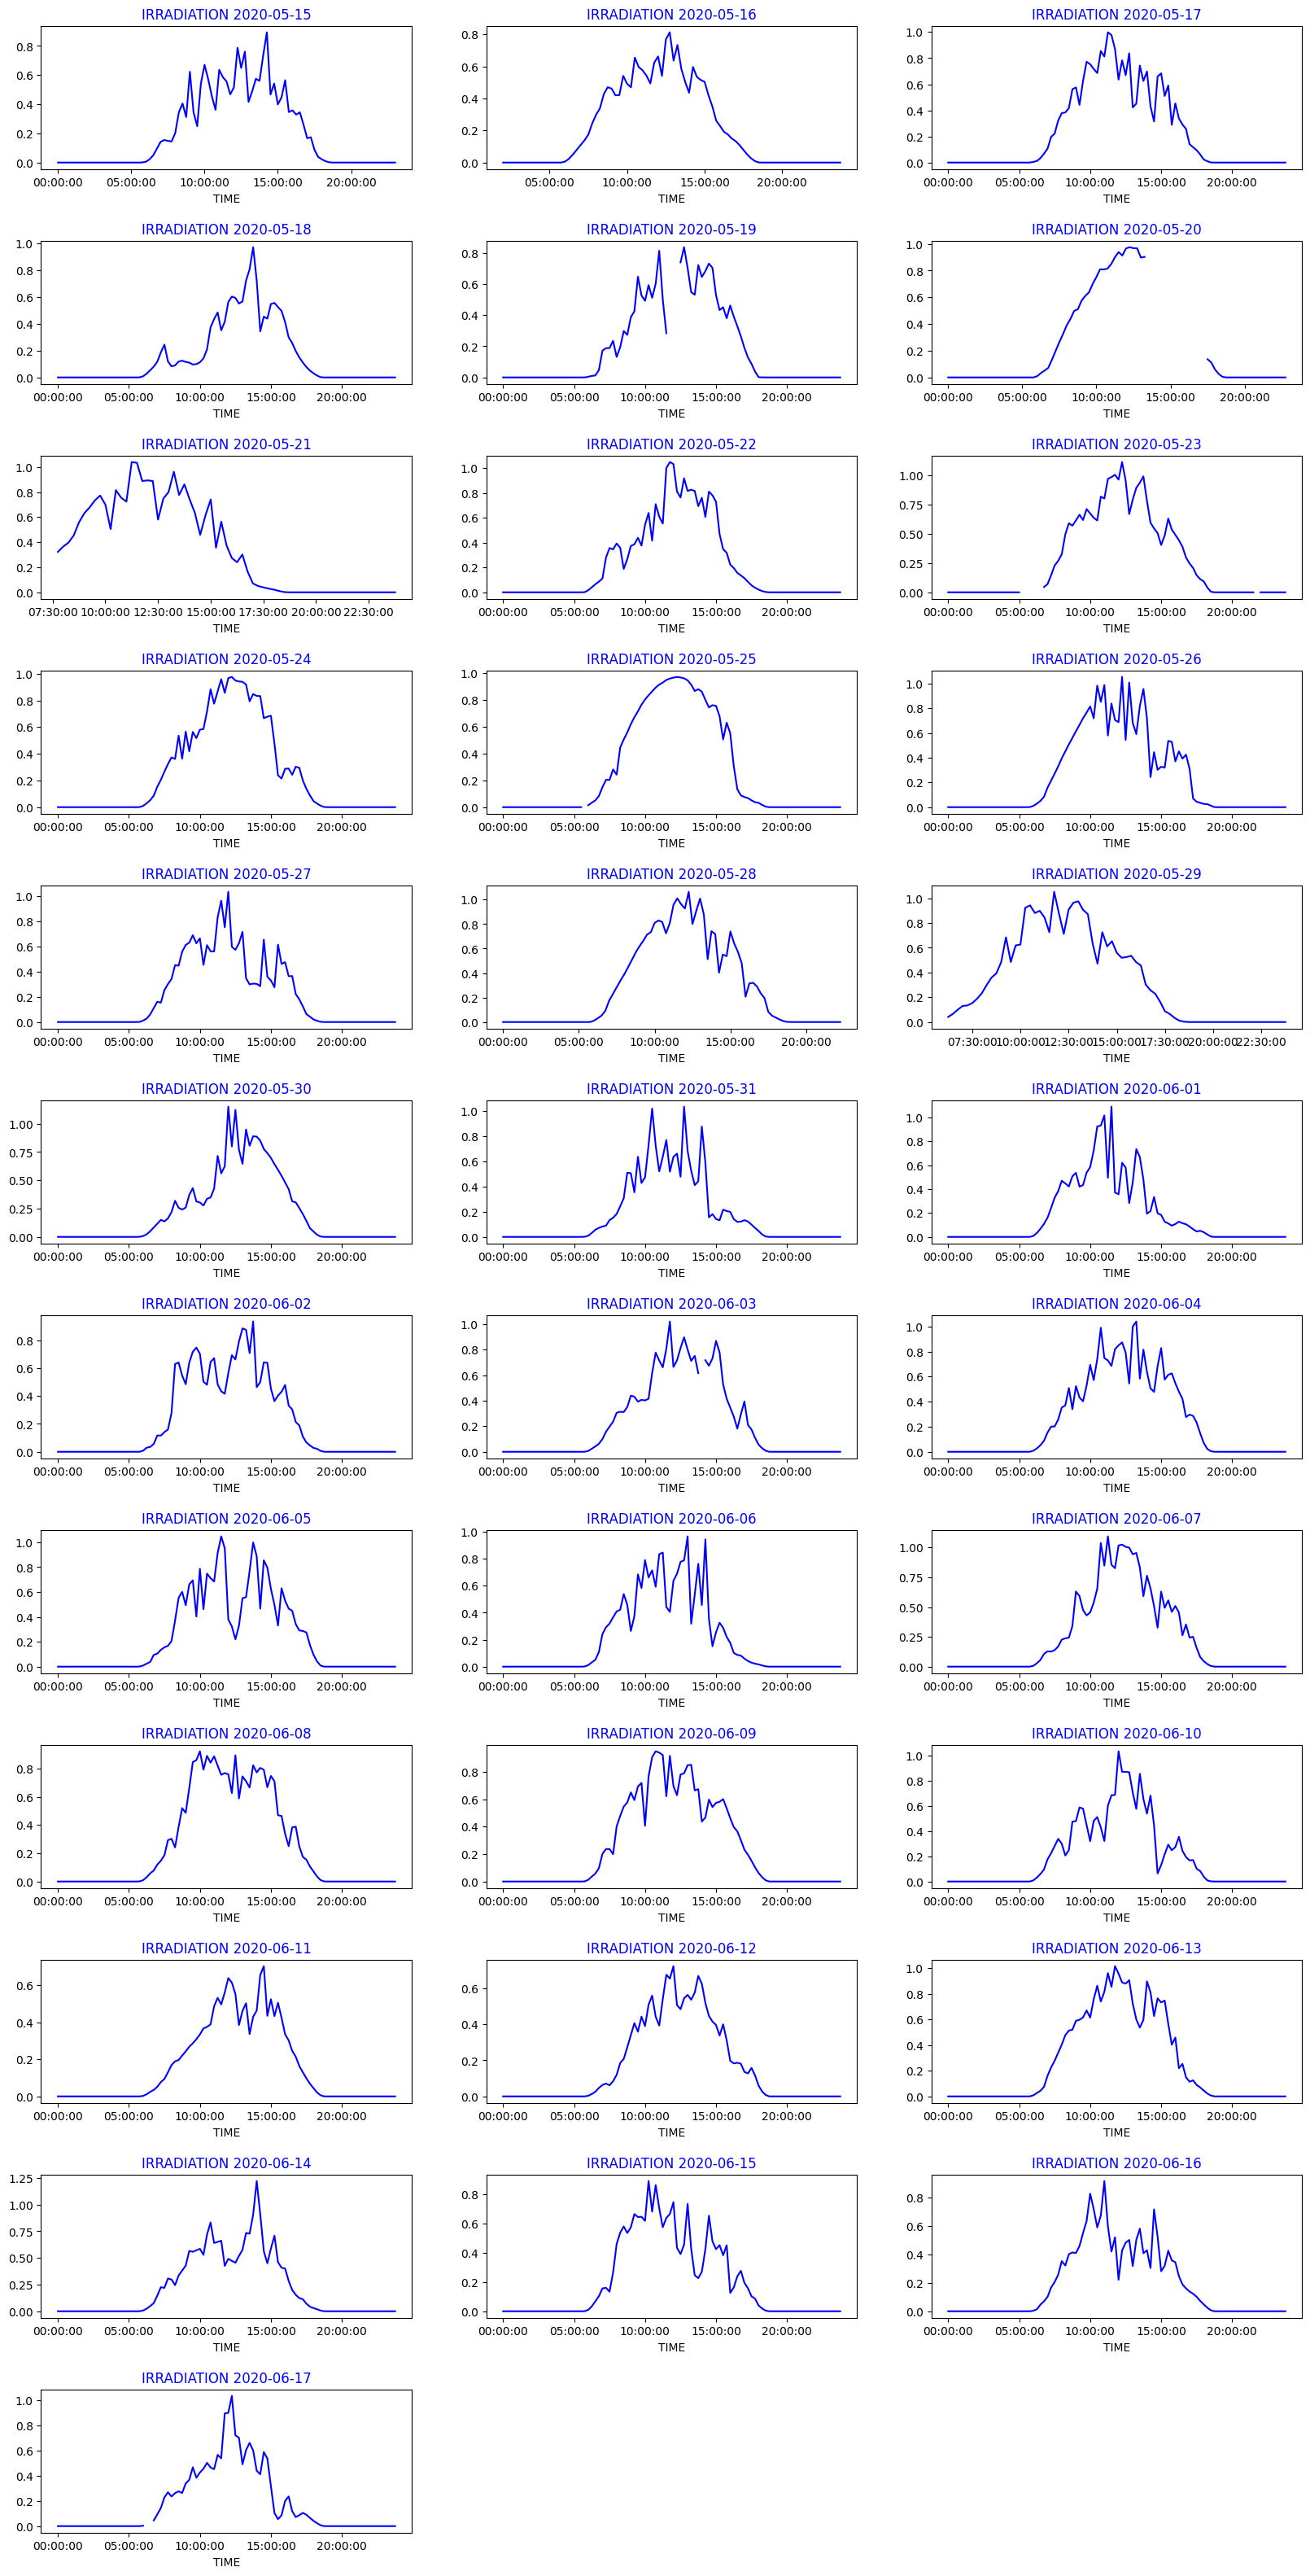

In [178]:
# Multiple plotting of irridation generation on a per day basis
# Visualizing irridation readings across different days

# creating dataframe
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

# defining a new data plotting function to create a grid of subplots
def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
# calling function
Daywise_plot(data=solar_irradiation, row=12, col=3)

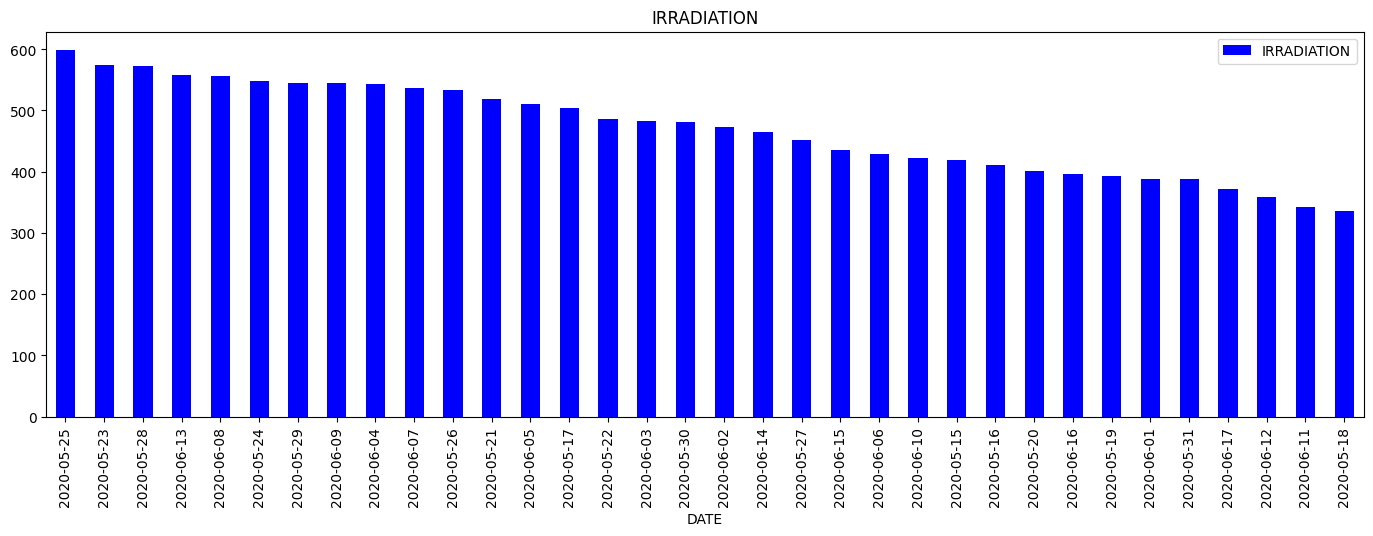

In [179]:
# Total irridation per day graphed on a bar plot in descending order
# This graph helps visualize and understand which days had the most and least irridation

daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

Most irridation on: 2020-05-25

Least irridation on: 2020-05-18

Notice, they are the same dates as Most DC power and Least DC power generated (respectively)

Ambient temperature readings are graphed below.

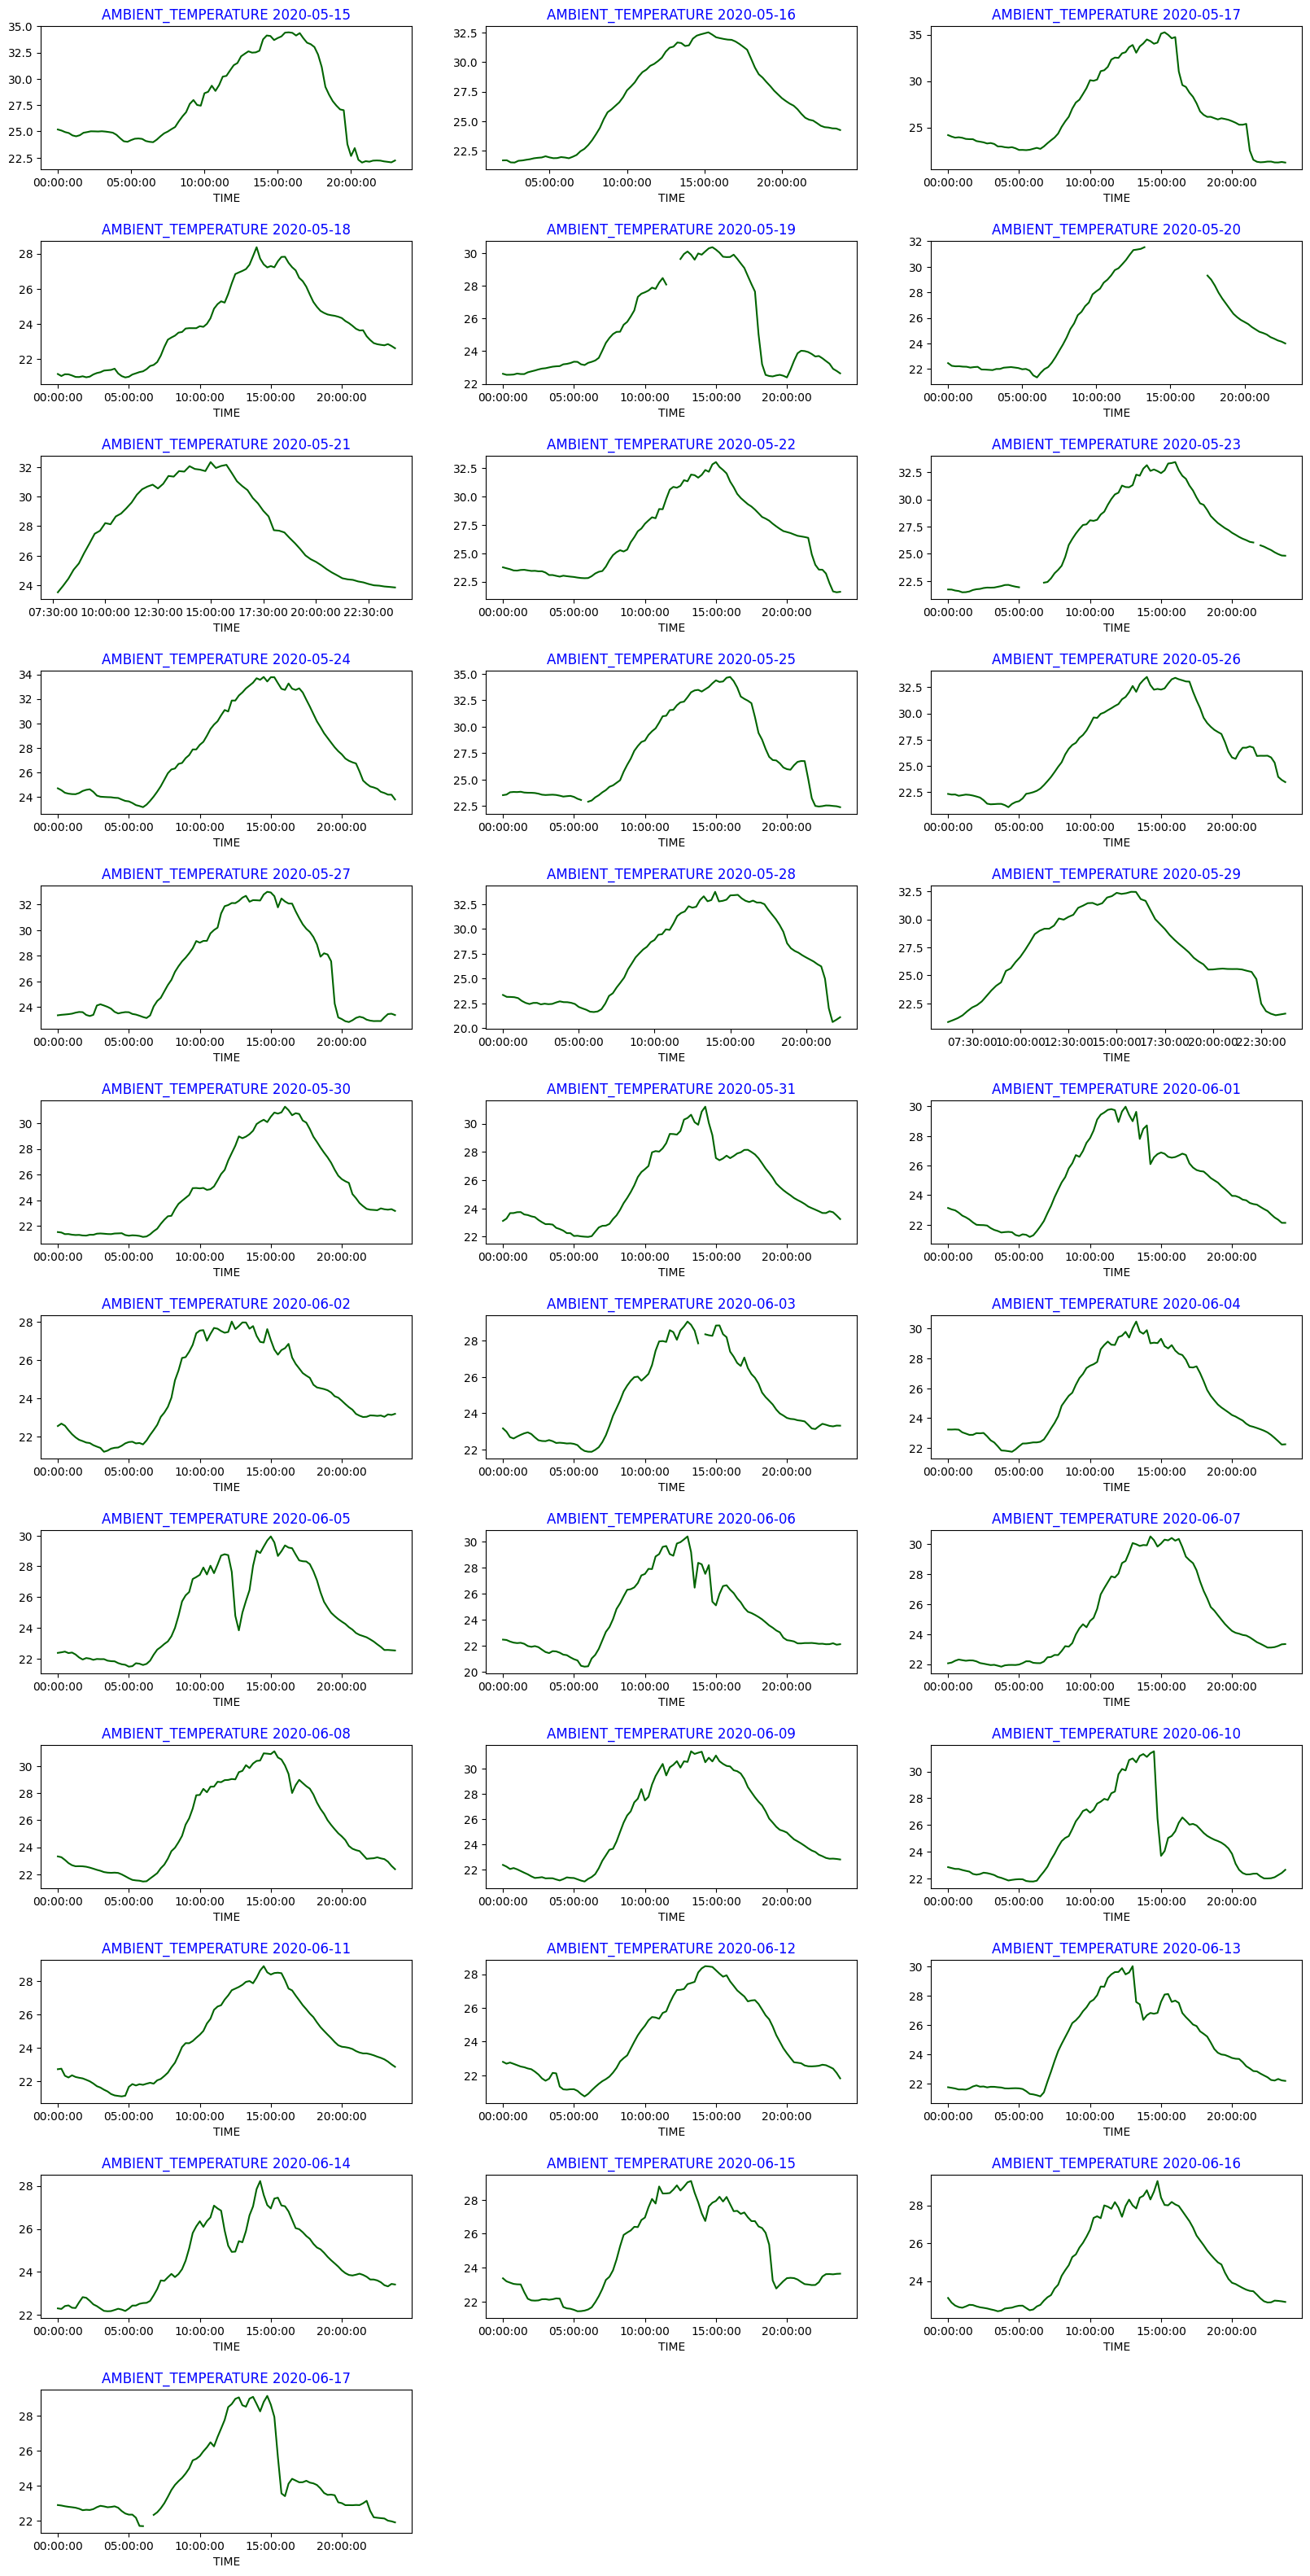

In [180]:
# Multiple plotting of ambient temperature on a per day basis
# Visualizing ambient temperature readings across different days

# creating dataframe
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

# defining a new data plotting function to create a grid of subplots
def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
# calling function
Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

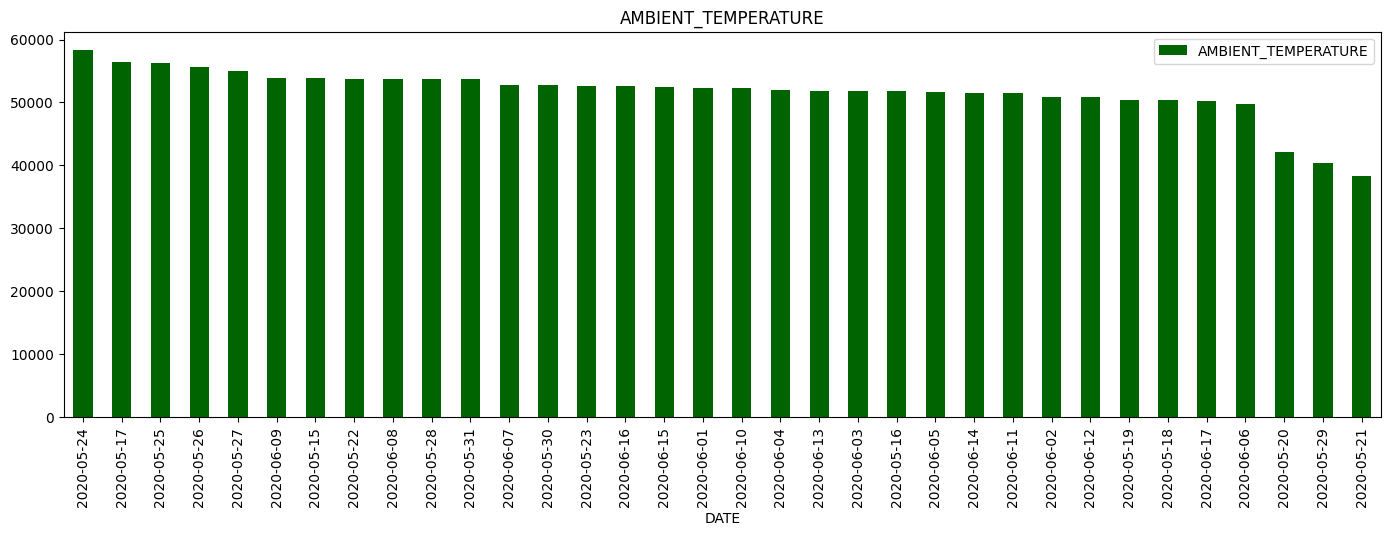

In [181]:
# Total ambient temperature per day graphed on a bar plot in descending order
# This graph helps visualize and understand which days had the most and least ambient temperature

daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

Biggest environmental factors affecting solar power generation:
- Amount and thickness of clouds. The thicker the clouds, the less sunlight can travel through and reach the PV modules. This will affect the system's output. Note: number of thicker clouds increase in winter
- Positioning of the sun - at midday is when max sunlight will reach the PV modules since there is less atmosphere to travel through
- Solar panel temperature is the biggest reason behind the system not reaching maximum energy ouputs though. This is for the following reasons:
    - Solar panels have a temperature coefficent that determines how much output decreases as the panel temperature increases above a certain threshold. As the temperature increases above this threshold, the efficiency of PV cells decrease, resulting in a lower output.
    - If panels aren't well ventilated, they can overheat easily and result in lower output (high ambient temperatures often present a challenge)
    - Desert regions and tropical climates expose panels to condtions that reduce their efficiency rapidly. Cooler seasons and environments are preferred.

Key note: It is a common misconception that peak performance (maximum output) is achieved during the hottest part of the day when the sun is beating down on the PV modules. This is not the case, and in fact the most often maximum output scenario is during cooler temperatures (sunny mornings and evenings)

The highest average DC Power generated and irridation is on 2020-05-25. Notice how both those graphs below are looking similar to an ideal graph (bell curve). The weather data (ambient and module temperatures) in the third graph is also looking strong. There are little to no clouds in the sky since there is very little variance in irridation and in temperature of the solar panel.

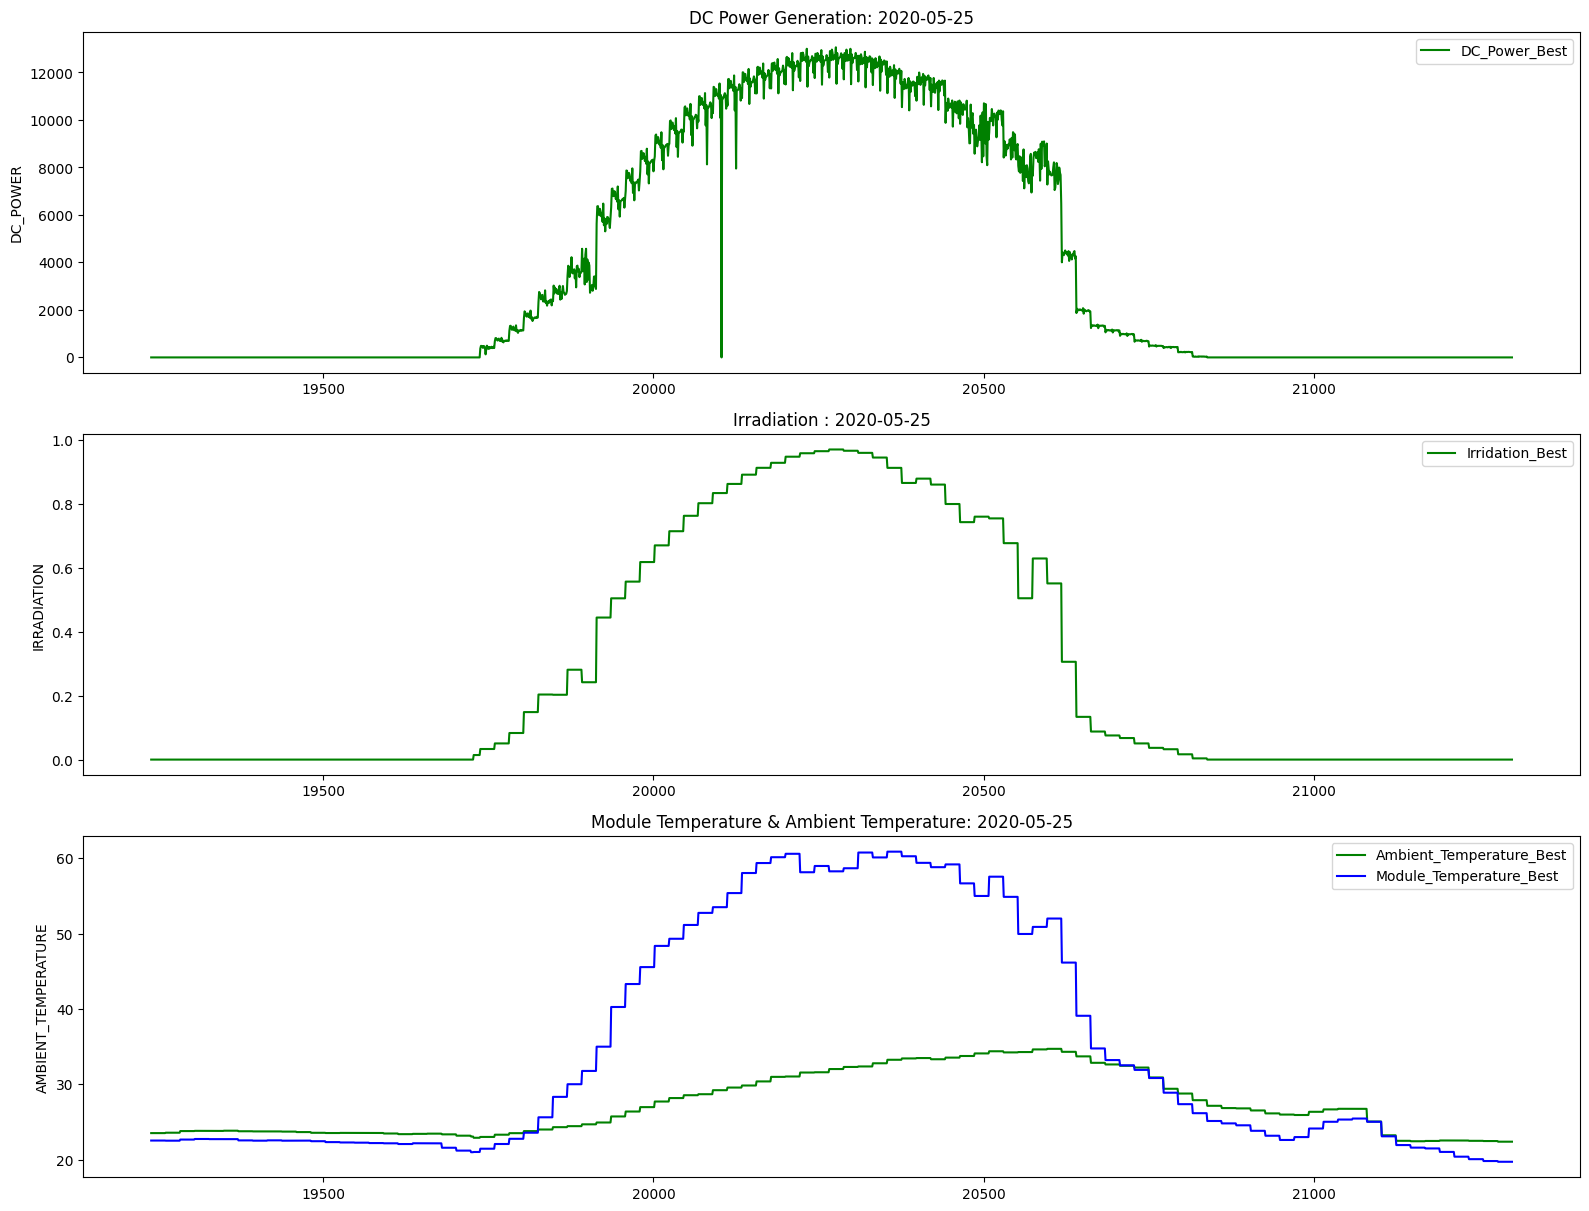

In [182]:
plt.figure(figsize=(16,16))

date=["2020-05-25"]

plt.subplot(411)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best",color='green')
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Best",color='green')
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best",color='green')
sns.lineplot(df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best",color='blue')
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]))

plt.tight_layout()
plt.show()

The lowest average DC Power generated and irridation is on 2020-05-18. This is apparent as there are many harsh fluctuations in the graphs below (they do not ressemble an ideal graph / bell curve).

Here are some possible reasons for these large fluctuations:
- At about 2PM there is a sharp decline in the DC_POWER generation from 12000 to about 5000 KWs.
- At about 2PM there is a sharp decline in IRRIDATION from about 0.97 to about 0.35, almost three times as less
- Module temperature also falls from 54 degrees C to 40 degrees C, yet ambient temperature remains fairly steady throughout

A possible reason for these reductions may be the weather - heavy rain, thick clouds. It is unlikely there is a fault in the system (bad weather is more probable, since that is a factor outside our control).

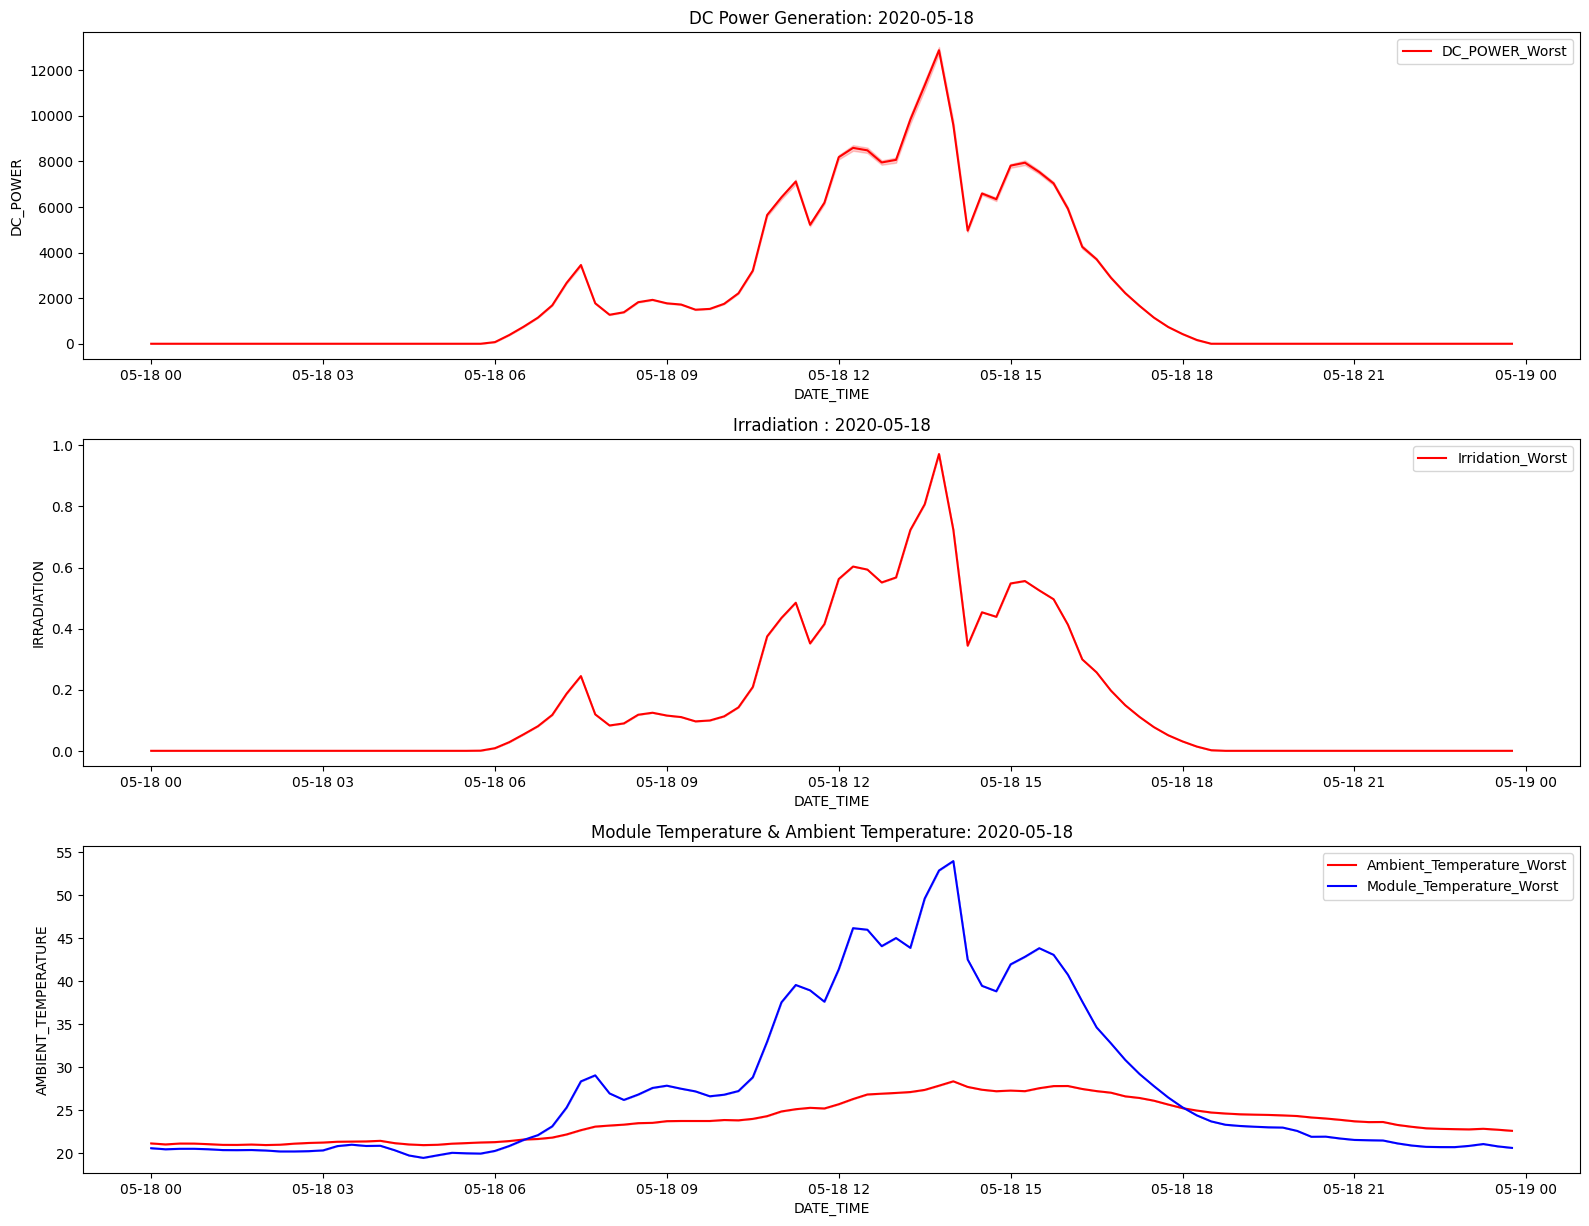

In [183]:
# defined date and confirmed correct date string (calculated above)
date = ["2020-05-18"]

# filter the dataframe with just this defined date
filtered_df = df_solar[df_solar["DATE_STRING"].isin(date)]

# create the subplot for DC Power
plt.figure(figsize=(16, 16))
plt.subplot(411)
sns.lineplot(x = 'DATE_TIME', y = 'DC_POWER', data = filtered_df, label = 'DC_POWER_Worst', color = 'red')
plt.title("DC Power Generation: {}" .format(date[0]))

# create the subplot for irridation
plt.subplot(412)
sns.lineplot(x = 'DATE_TIME', y = 'IRRADIATION', data = filtered_df, label="Irridation_Worst",color='red')
plt.title("Irradiation : {}" .format(date[0]))

# create the subplot for ambient and module temperature
plt.subplot(413)
sns.lineplot(x = 'DATE_TIME', y = 'AMBIENT_TEMPERATURE', data = filtered_df, label="Ambient_Temperature_Worst",color='red')
sns.lineplot(x = 'DATE_TIME', y = 'MODULE_TEMPERATURE', data = filtered_df, label="Module_Temperature_Worst",color='blue')
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]))

plt.tight_layout()
plt.show()

Solar Power Plant Inverter Efficiency Calculation

Inverter efficiency refers to how much DC power will be converted to AC power. This is a necessary measurement since some power will be lost during the transition between these 2 forms via HEAT LOSS. 

Therefore, inverter efficiency = PAC / PDC.

PAC = AC output power (W)
PDC = DC input power (W)

The efficiency of an inverter increases with higher load power capacities (more devices connected) - provided it does not exceed the inverter's maximum output capacity.

Below a certain threshold (typically around 15% of the inverter's maximum capacity), efficiency tends to decrease.

To achieve maximum efficiency, one must match the capacity of the inverter (maximum output capability) with the expected load capacity. This ensures the inverter is not being underutilized or overloaded - just right. This resulsts in more output AC power from the same amount of input DC power, which is most beneficial for maximizing energy conversion and reducing operational costs.

In [184]:
dc_power_array = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
ac_power_array = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

max_dc_power = np.max(dc_power_array)
max_ac_power = np.max(ac_power_array)

solar_plant_1_efficiency = (max_ac_power / max_dc_power) * 1000
print(f"Power ratio AC/DC (efficiency) of PV Power Plant 1: {solar_plant_1_efficiency:0.3f}%")

Power ratio AC/DC (efficiency) of PV Power Plant 1: 97.501%


In [185]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()

print(f"There are {len(AC_list)} positive values in the AC_POWER column from the merged DataFrame")

There are 36823 positive values in the AC_POWER column from the merged DataFrame


In [186]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
print(f"There are {len(DC_list)} positive values in the DC_POWER column from the merged DataFrame")

There are 36823 positive values in the DC_POWER column from the merged DataFrame


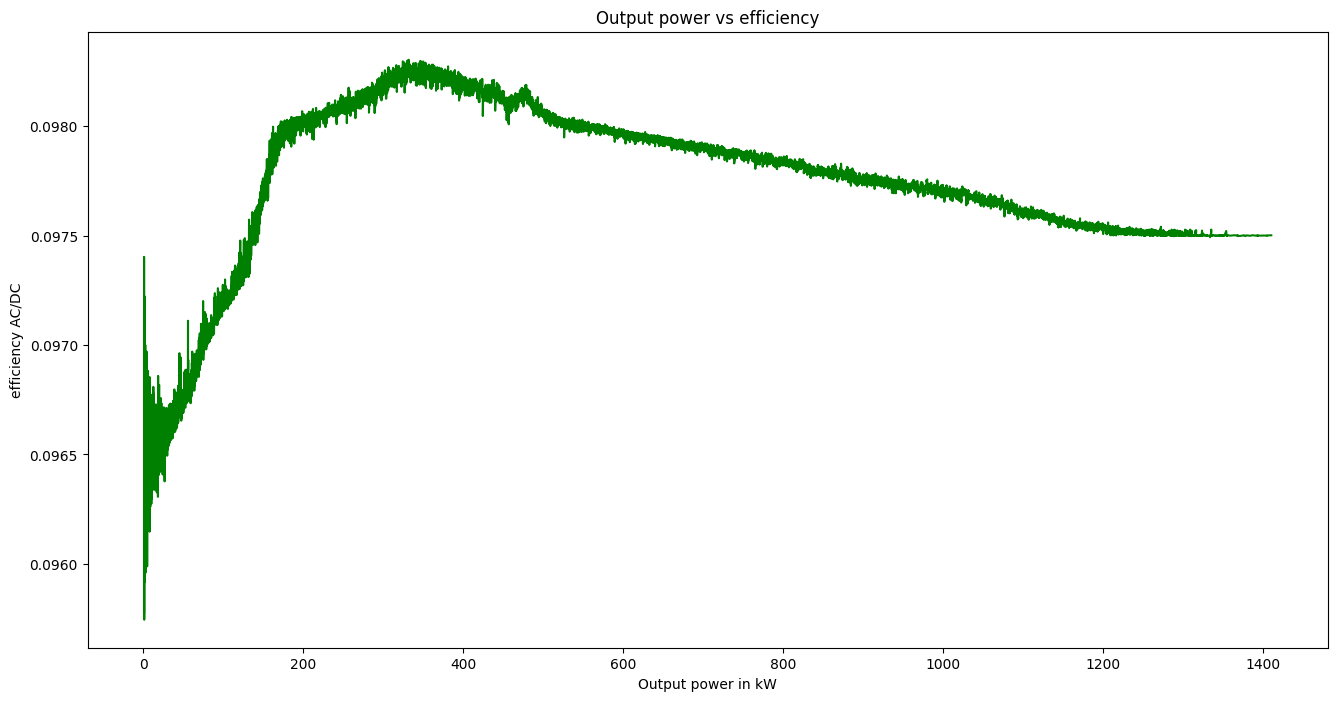

In [187]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

Solar Power Predictions (Basic Model Training)

We want to predict and analyze 'AC_POWER' in this DataFrame (that is our target variable). This will be done using the following features:
- 'DAILY_YIELD'
- 'TOTAL_YIELD'
- 'AMBIENT_TEMPERATURE'
- 'MODULE_TEMPERATURE'
- 'IRRADIATION'
- 'DC_POWER'

Linear regression will be used below.

In [188]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
Y = df2['AC_POWER']

X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,0.0,6259559.0,25.184316,22.857507,0.0,0.0
1,0.0,6183645.0,25.184316,22.857507,0.0,0.0
2,0.0,6987759.0,25.184316,22.857507,0.0,0.0
3,0.0,7602960.0,25.184316,22.857507,0.0,0.0
4,0.0,7158964.0,25.184316,22.857507,0.0,0.0


In [189]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [190]:
# train_test_split functions splits dataset into separate training and testing sets
# allocating 20% of data to be used for testing
# assigning a random_state ensures reproducability of the state

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=21)

In [191]:
# training a linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)

# .score method computes R-squared value of the model on the test data
# R-squared score represents the proportion of the variance for the dependent variable (Y)
# an R-squares value close to 1 means the model explains a large proportion of the variance in the dependent variable
# (does not imply causation or that the model is perfect)
# in order words: how well the model explains the variance in the test data
score_lr = 100*lr_clf.score(X_test,Y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9995%


A LR Model score of 99.9995% indicates that the model explains 99.9995% of the variance in the test data, suggesting it is a good fit.

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,Y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


An R2 score of 100.0% indicates that the model explains 100% of the variance in the test data, suggesting a strong fit. The same applies for the following 2 models.

In [193]:
# random forest regressor

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,Y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


In [194]:
# decision tree regressor

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)

y_pred_dtr = rfr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,Y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


Result Prediction using a Random Forest Regressor

In [195]:
# using the trained random forest regressor to make predictions on the test data
prediction = rfr.predict(X_test)
print(prediction)

# the values printed represent the predicted target values for each sample in the X_test dataset

[   0.         1071.33889291  299.5535     ...  669.40894642  377.78991071
  117.48532143]


In [196]:
# comparing the actual values of the target variable to those predicted
# helps us understand how close predications are to actual values
cross_checking = pd.DataFrame({'Actual' : Y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
43819,0.0000,0.000000
2949,1072.3250,1071.338893
33769,299.8125,299.553500
47825,0.0000,0.000000
29370,0.0000,0.000000


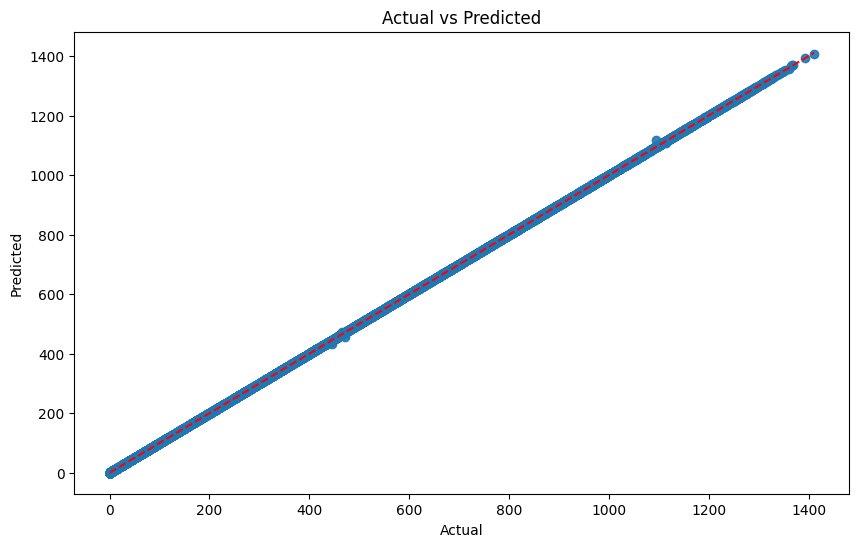

In [197]:
# a scatter plot demonstrating the table above
# points on the red line indicate perfect predictions
plt.figure(figsize=(10, 6))
plt.scatter(cross_checking['Actual'], cross_checking['Predicted'], alpha=0.9)
plt.plot([cross_checking['Actual'].min(), cross_checking['Actual'].max()], 
         [cross_checking['Actual'].min(), cross_checking['Actual'].max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [198]:
# determining the error between the actual and prediction values
# displaying the error
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
43819,0.0000,0.000000,0.000000
2949,1072.3250,1071.338893,0.986107
33769,299.8125,299.553500,0.259000
47825,0.0000,0.000000,0.000000
29370,0.0000,0.000000,0.000000


In [199]:
# table to visually inspect a subset of data with enhanced readability and aesthetics
# making it easier to identify patterns or outliers based on the gradient coloring and font properties

cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'darkblack',
            'font-size': '15px'
        })

,Actual,Predicted,Error
15416,0.000000,0.000000,0.000000
2202,0.000000,0.000000,0.000000
24654,985.687500,985.783554,-0.096054
31447,0.000000,0.000000,0.000000
43271,0.000000,0.000000,0.000000
67684,789.625000,789.619875,0.005125
61760,583.514286,583.395750,0.118536
24036,331.100000,331.308250,-0.208250
22443,1182.857143,1182.845357,0.011786
33647,8.475000,8.450393,0.024607
